# Quantum computing code draft for SQL grammar to circuit

## Parsing

Parse the SQL queries from the examples folder. The queries are parsed with ANTRL framework which is extensive general-purpose parsing tool. We selected the SQLite grammar for its simplicity in ANTRL. Because the core features of SQL are the same for any relational database, this code does not depend on system dependent SQL ''dialects''.

In [1]:
from antlr4 import *
from SQLiteLexer import SQLiteLexer
from SQLiteParser import SQLiteParser
from SQLiteParserListener import SQLiteParserListener
import json

input_file = "examples/JOB-3a.sql"

input = FileStream(input_file)
lexer = SQLiteLexer(input)
stream = CommonTokenStream(lexer)
parser = SQLiteParser(stream)
tree = parser.parse()

print("Whole parse tree: ")
print(tree.toStringTree(recog=parser))

Whole parse tree: 
(parse (sql_stmt_list (sql_stmt (select_stmt (select_core SELECT (result_column (expr (function_name (any_name MIN)) ( (expr (table_name (any_name t)) . (column_name (any_name title))) )) AS (column_alias movie_title)) FROM (table_or_subquery (table_name (any_name keyword)) AS (table_alias (any_name k))) , (table_or_subquery (table_name (any_name movie_info)) AS (table_alias (any_name mi))) , (table_or_subquery (table_name (any_name movie_keyword)) AS (table_alias (any_name mk))) , (table_or_subquery (table_name (any_name title)) AS (table_alias (any_name t))) WHERE (expr (expr (expr (expr (expr (expr (expr (expr (table_name (any_name k)) . (column_name (any_name keyword))) LIKE (expr (literal_value '%sequel%'))) AND (expr (expr (table_name (any_name mi)) . (column_name (any_name info))) IN (expr ( (expr (literal_value 'Sweden')) , (expr (literal_value 'Norway')) , (expr (literal_value 'Germany')) , (expr (literal_value 'Denmark')) , (expr (literal_value 'Swedish')) 

## Diagrammatic representation of SQL language elements in context free grammar

We walk the tree and collect the elements in a monoidal category. This creates a diagrammatic representation for the parsed SQL query. `SQLiteParserListener` class implements DisCoPy construction. First we collect the abstract parse tree but we also modify it so that we collect SELECT and the columns into the same element, FROM and tables into the same element and WHERE and the filtering clauses into the same element. This interpretation follows the [railroad diagram representation](https://www.sqlite.org/syntaxdiagrams.html#select-core) more accurately than the current parsing. It also enables us to map the parse tree correctly later.

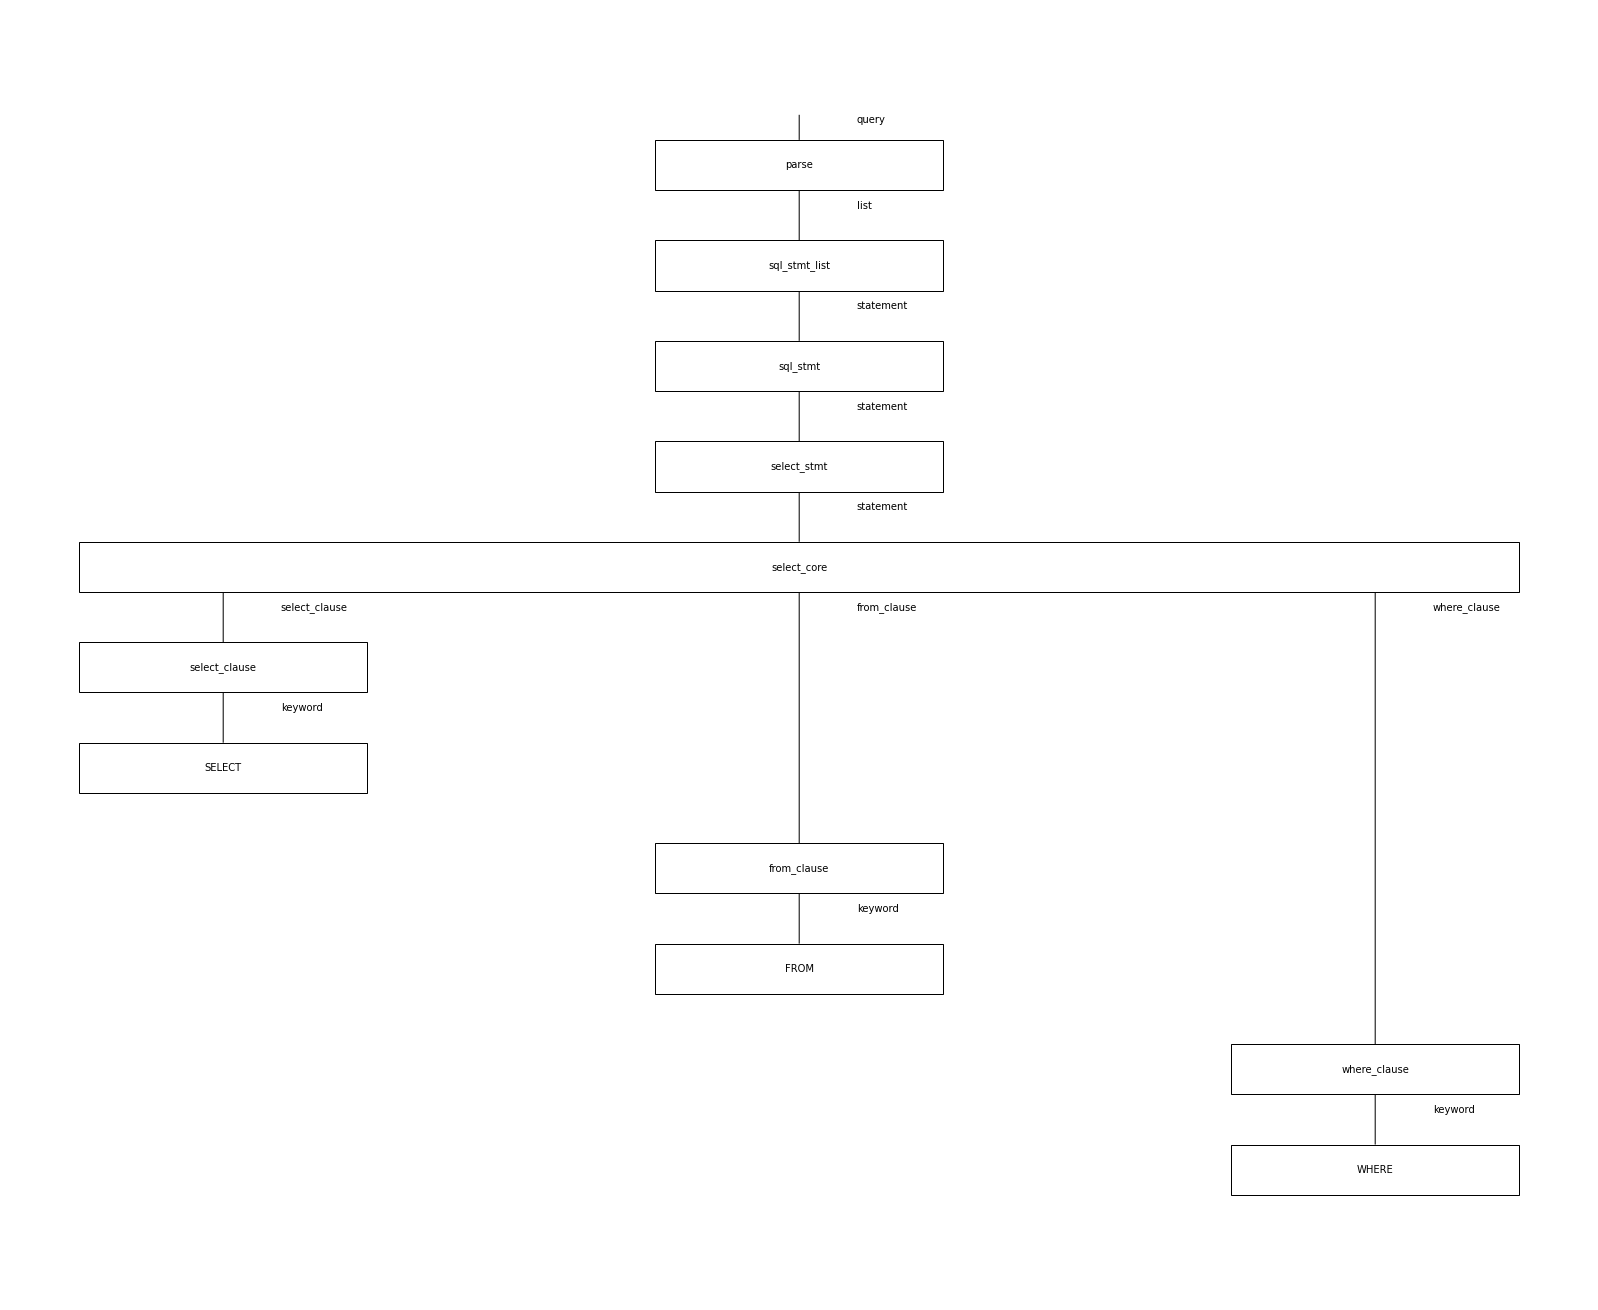

In [5]:
walker = ParseTreeWalker()
listener = SQLiteParserListener(parser)
walker.walk(listener, tree)
diagram = listener.get_final_diagram()
diagram.draw(figsize=(22, 18))

In [6]:
# For debugging

#diagrams = listener.get_SQL_diagrams()
#for key in diagrams:
#    print(key)
#    for diagram in diagrams[key]:
#        diagram.draw(figsize=(8, 8))

## Functorially map context free grammar representations to pregroup representations

Because the abstract syntax tree contains lots of unnecessary information for our purposes, we can functorially rewrite it. This functorial rewriting process is just something that we have developed especially for this work and it is open to discussion if there exists a more suitable rewrite mapping. Also, the parts `select_main`, `from_main` and `where_main` are especially designed for this work although they are visible in the SQLite railroad diagrams without any special name.

Functor simply describes how the boxes and types are mapped. In this rewriting process we want to simplify the abstract syntax tree. 

In [7]:
functor_data = None
with open('rewriter_functor_data.json') as json_file:
    functor_data = json.load(json_file)
    
def object_mapping(obj):
    dom_name = obj.name
    try:
        cod_name = functor_data["object_function"][dom_name]
    except:
        cod_name = dom_name
    return Ty(cod_name)

def arrow_mapping(box):
    function_dom_name = box.name
    try:
        cod_name = functor_data["arrow_function"][function_dom_name]
    except:
        cod_name = dom_name
    return Box(cod_name, dom=, cod=)
    

SyntaxError: invalid syntax (385970163.py, line 19)

In [ ]:
Rewriter = Functor(ob = lambda x: object_mapping(x), ar = lambda f: arrow_mapping(x))

## Convert pregroup representations to circuits